** Line-line plots 5 massive clusters **

2016may10: All plots in place, want to merge them into two only.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from matplotlib import gridspec

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

** Read in data and models **

In [3]:
d = fits.getdata('A1689membernoemis.fits')
df_a1689=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_a1689.columns = map(str.lower, df_a1689.columns)
d = fits.getdata('RXJ0056p2p2622membernoemis.fits')
df_rxj0056=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj0056.columns = map(str.lower, df_rxj0056.columns)
d = fits.getdata('RXJ0027p6p2616membernoemis.fits')
df_rxj0027=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj0027.columns = map(str.lower, df_rxj0027.columns)
d = fits.getdata('RXJ1347p5m1145membernoemis.fits')
df_rxj1347=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj1347.columns = map(str.lower, df_rxj1347.columns)

d = fits.getdata('MS0451p6m0305membernoemis.fits')
df_ms0451=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_ms0451.columns = map(str.lower, df_ms0451.columns)
d = fits.getdata('RXJ0152p7m1357membernoemis.fits')
df_rxj0152=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj0152.columns = map(str.lower, df_rxj0152.columns)
d = fits.getdata('RXJ1226p9p3332membernoemis.fits')
df_rxj1226=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj1226.columns = map(str.lower, df_rxj1226.columns)

d = fits.getdata('RXJ0848p6p4453memberfit.fits')
df_rxj0848=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_rxj0848.columns = map(str.lower, df_rxj0848.columns)

d = fits.getdata('ComafitY.fits')
df_coma=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_coma.columns = map(str.lower, df_coma.columns)
d = fits.getdata('PerseusA194.fits')
df_pers=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_pers.columns = map(str.lower, df_pers.columns)

d = fits.getdata('ThomasMaraston2011.fits')
df_thomas=pd.DataFrame(np.array(d).byteswap().newbyteorder())
df_thomas.columns = map(str.lower, df_thomas.columns)

** define mkline to draw the fits **

In [4]:
def mkline(x1, x2, y1, y2, lcolor):
    xdata = [x1, x2]
    ydata = [y1, y2]
    plt.plot(xdata, ydata, lcolor)

** define scatterplot as generic errorbar plot function **

In [5]:
def scatterplot(x, y, ex, ey, symbol, msize, xlabel, ylabel, 
                xlow, xhigh, ylow, yhigh, plotnumber, title, serieslabel):
    edge=0
    if symbol[0]=='y':
        edge=1
    plt.errorbar(x, y, xerr=ex, yerr=ey, fmt=symbol, markersize=msize, markeredgewidth=edge, label=serieslabel, capsize=0)
    plt.xlim(xlow, xhigh)
    plt.ylim(ylow, yhigh)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plotnumber.text(.08, .9, title, horizontalalignment='left', fontsize=14,
                    transform=plotnumber.transAxes)

** Select and plot model grid **

In [6]:
def mkmodelgrid(alphafe, xvariable, yvariable, colline, linewidth, mkarrows=True, anchorx=0.5, anchory=0.3):
    ages = [2,3,5,8,11,15]
    feh = [-0.33, 0.0, 0.35, 0.67]
    # Delta in each line index for dlage=0.3, dfe=0.3 dalpha=0.3 - this needs to be a dictionary
    dlage = 0.3
    dfe = 0.3
    dalpha = 0.3
    delta_lage = {'lhbetaem': dlage*-0.23, 'lfe': dlage*0.122, 'lmgb': dlage*0.242, 'lmgfe': dlage*0.182, 
                  'lhdga': dlage*-0.126, 'lc4668': dlage*0.121, 'lfe4383': dlage*0.272, 'cn3883': dlage*0.076, 
                  'lc4668fe': dlage*0.212, 'cn3883lfe': 0.1}
    delta_fe = {'lhbetaem': dfe*-0.108, 'lfe': dfe*0.26, 'lmgb': dfe*0.322, 'lmgfe': dfe*0.292, 
                'lhdga': dfe*-0.106, 'lc4668': dfe*0.484, 'lfe4383': dfe*0.331, 'cn3883': dfe*0.150, 
                'lc4668fe': dfe*0.594, 'cn3883lfe': 0.1}
    delta_alpha ={'lhbetaem': dalpha*0.053, 'lfe': dalpha*-0.243, 'lmgb': dalpha*0.242, 'lmgfe': 0., 
                  'lhdga': dalpha*0.091, 'lc4668': dalpha*0.116, 'lfe4383': dalpha*-0.356, 
                  'cn3883': dalpha*0.072, 'lc4668fe': 0.0, 'cn3883lfe': 0.0}
    
    for num in xrange(0,6):
        df_select = df_thomas.loc[(df_thomas['feh'] >=-0.33) &(df_thomas['age'] == ages[num]) & (df_thomas['alphafe']==alphafe)]
        plt.plot(df_select[xvariable], df_select[yvariable], color=colline, linestyle='-.', 
                 linewidth=linewidth, dashes=(15,7), label='age')
#        print df_select
    for num in xrange(0,4):
        df_select = df_thomas.loc[(df_thomas['age'] >= ages[0]) & (df_thomas['feh'] == feh[num]) & (df_thomas['alphafe']==alphafe)]
#        print df_select
        plt.plot(df_select[xvariable], df_select[yvariable], color=colline, linestyle='--', linewidth=linewidth, label='metal')
#        df_select = df_thomas.loc[(df_thomas['feh'] == -0.33) & (df_thomas['age'] == ages[i]) & (df_thomas['alphafe']==alphafe)]
    if mkarrows:
        xloc = anchorx+delta_lage[xvariable]
        yloc = anchory+delta_lage[yvariable]
        plt.annotate('', xy=(xloc,yloc), xytext=(anchorx, anchory),
            arrowprops=dict(color='black', shrink=0., width=0.5, headwidth=8.))
        xloc = anchorx+delta_fe[xvariable]
        yloc = anchory+delta_fe[yvariable]
        plt.annotate('', xy=(xloc,yloc), xytext=(anchorx, anchory),
            arrowprops=dict(facecolor='white', shrink=0., width=0.5, headwidth=8.))
        xloc = anchorx+delta_alpha[xvariable]
        yloc = anchory+delta_alpha[yvariable]
        plt.annotate('', xy=(xloc,yloc), xytext=(anchorx, anchory),
            arrowprops=dict(color='purple', shrink=0., width=0.5, headwidth=8.))

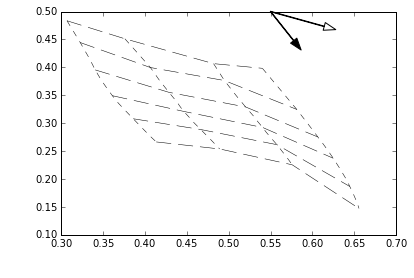

In [7]:
mkmodelgrid(0.0, 'lfe', 'lhbetaem', 'k', 0.5, anchorx=0.55, anchory=0.5)

** Visible indices versus each other - merged figure of all clusters **

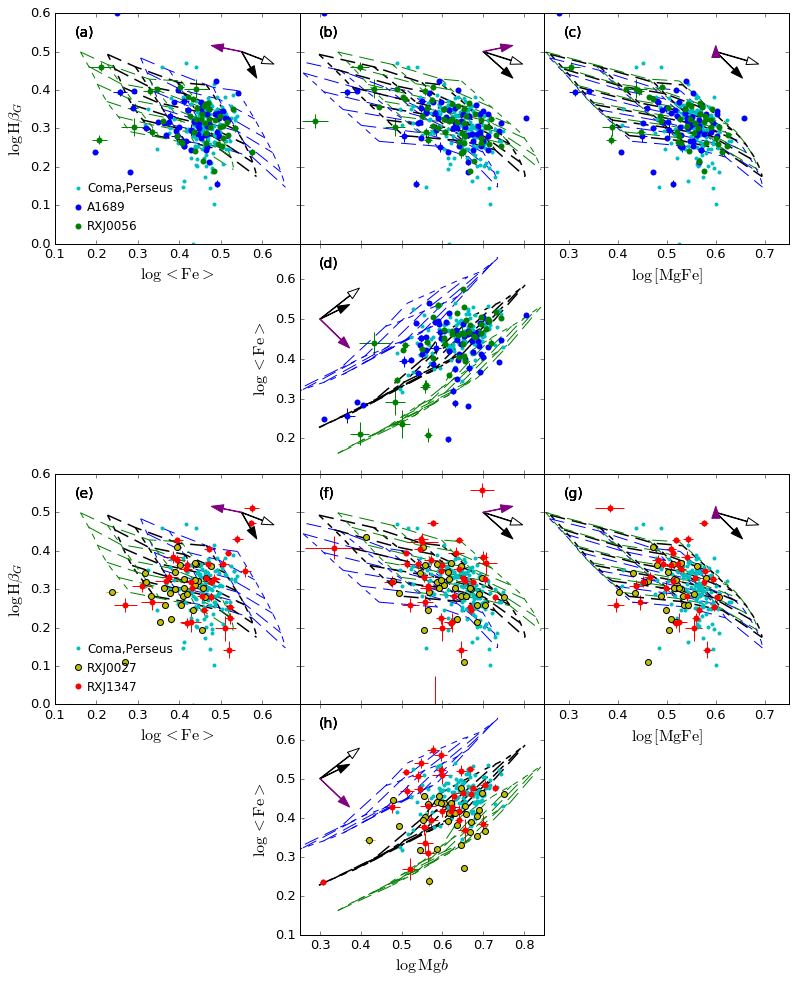

In [8]:
gs1 = gridspec.GridSpec(4,3)
gs1.update(left=0.1, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.0)
fig = plt.figure(figsize=(12,16))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), fontsize=13)
plt.setp(ax1.get_yticklabels(), fontsize=13)

mkmodelgrid(0.0, 'lfe', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.55, anchory=0.5)
mkmodelgrid(0.3, 'lfe', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lfe', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lfe_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'Coma')
scatterplot(df_pers.lfe_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'Perseus')
scatterplot(df_a1689.lfe_cor, df_a1689.lhbetaem_cor, df_a1689.e_lfe, df_a1689.e_lhbetaem, 'bo', 6,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'A1689')
scatterplot(df_rxj0056.lfe_cor, df_rxj0056.lhbetaem_cor, df_rxj0056.e_lfe, df_rxj0056.e_lhbetaem, 'go', 6,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'RXJ0056')

# get handles
handles, labels = ax1.get_legend_handles_labels()
# Get the last three only, Remove extra legend entry due to Coma and Perseus coming from different data frames
handles = handles[-3:]
labels = labels[-3:]
labels[0] = 'Coma,Perseus'
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='lower left',numpoints=1, handletextpad=-0.2, frameon=False)

ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lmgb', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.7, anchory=0.5)
mkmodelgrid(0.3, 'lmgb', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgb', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgb_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'Coma')
scatterplot(df_pers.lmgb_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'Perseus')
scatterplot(df_a1689.lmgb_cor, df_a1689.lhbetaem_cor, df_a1689.e_lmgb, df_a1689.e_lhbetaem, 'bo', 6,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'A1689')
scatterplot(df_rxj0056.lmgb_cor, df_rxj0056.lhbetaem_cor, df_rxj0056.e_lmgb, df_rxj0056.e_lhbetaem, 'go', 6,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'RXJ0056')


ax3 = plt.subplot(gs1[0,2])
plt.setp(ax3.get_xticklabels(), fontsize=13)
plt.setp(ax3.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lmgfe', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.6, anchory=0.5)
mkmodelgrid(0.3, 'lmgfe', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgfe', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgfe, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'Coma')
scatterplot(df_pers.lmgfe, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'Perseus')
scatterplot(df_a1689.lmgfe, df_a1689.lhbetaem_cor, df_a1689.e_lmgfe, df_a1689.e_lhbetaem, 'bo', 6,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'A1689')
scatterplot(df_rxj0056.lmgfe, df_rxj0056.lhbetaem_cor, df_rxj0056.e_lmgfe, df_rxj0056.e_lhbetaem, 'go', 6,
           r'$\log\, \rm{[MgFe]}$', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'RXJ0056')


ax4 = plt.subplot(gs1[1,1])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), fontsize=13)

mkmodelgrid(0.0, 'lmgb', 'lfe', 'b', 1., mkarrows=True, anchorx=0.3, anchory=0.5)
mkmodelgrid(0.3, 'lmgb', 'lfe', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgb', 'lfe', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgb_cor, df_coma.lfe_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0.11, 0.69, ax4, '(d)', 'Coma')
scatterplot(df_pers.lmgb_cor, df_pers.lfe_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0.11, 0.69, ax4, '(d)', 'Perseus')
scatterplot(df_a1689.lmgb_cor, df_a1689.lfe_cor, df_a1689.e_lmgb, df_a1689.e_lfe, 'bo', 6,
           '', '', 0.25, 0.85, 0.11, 0.69, ax4, '(d)', 'A1689')
scatterplot(df_rxj0056.lmgb_cor, df_rxj0056.lfe_cor, df_rxj0056.e_lmgb, df_rxj0056.e_lfe, 'go', 6,
           r'$\log\, {\rm Mg}b$', r'$\log\, <{\rm Fe}>$', 0.25, 0.85, 0.11, 0.69, ax4, '(d)', 'RXJ0056')

# ========
ax5 = plt.subplot(gs1[2,0])
plt.setp(ax5.get_xticklabels(), fontsize=13)
plt.setp(ax5.get_yticklabels(), fontsize=13)

mkmodelgrid(0.0, 'lfe', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.55, anchory=0.5)
mkmodelgrid(0.3, 'lfe', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lfe', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lfe_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax5, '(e)', 'Coma')
scatterplot(df_pers.lfe_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax5, '(e)', 'Perseus')
scatterplot(df_rxj0027.lfe_cor, df_rxj0027.lhbetaem_cor, df_rxj0027.e_lfe, df_rxj0027.e_lhbetaem, 'yo', 6,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax5, '(e)', 'RXJ0027')
scatterplot(df_rxj1347.lfe_cor, df_rxj1347.lhbetaem_cor, df_rxj1347.e_lfe, df_rxj1347.e_lhbetaem, 'ro', 6,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax5, '(e)', 'RXJ1347')

# get handles
handles, labels = ax5.get_legend_handles_labels()
# Get the last three only, Remove extra legend entry due to Coma and Perseus coming from different data frames
handles = handles[-3:]
labels = labels[-3:]
labels[0] = 'Coma,Perseus'
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax5.legend(handles, labels, loc='lower left',numpoints=1, handletextpad=-0.2, frameon=False)

ax6 = plt.subplot(gs1[2,1])
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lmgb', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.7, anchory=0.5)
mkmodelgrid(0.3, 'lmgb', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgb', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgb_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0., 0.6, ax6, '(f)', 'Coma')
scatterplot(df_pers.lmgb_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0., 0.6, ax6, '(f)', 'Perseus')
scatterplot(df_rxj0027.lmgb_cor, df_rxj0027.lhbetaem_cor, df_rxj0027.e_lmgb, df_rxj0027.e_lhbetaem, 'yo', 6,
           '', '', 0.25, 0.85, 0., 0.6, ax6, '(f)', 'RXJ0027')
scatterplot(df_rxj1347.lmgb_cor, df_rxj1347.lhbetaem_cor, df_rxj1347.e_lmgb, df_rxj1347.e_lhbetaem, 'ro', 6,
           '', '', 0.25, 0.85, 0., 0.6, ax6, '(f)', 'RXJ1347')

ax7 = plt.subplot(gs1[2,2])
plt.setp(ax7.get_xticklabels(), fontsize=13)
plt.setp(ax7.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lmgfe', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.6, anchory=0.5)
mkmodelgrid(0.3, 'lmgfe', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgfe', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgfe, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.75, 0., 0.6, ax7, '(g)', 'Coma')
scatterplot(df_pers.lmgfe, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.75, 0., 0.6, ax7, '(g)', 'Perseus')
scatterplot(df_rxj0027.lmgfe, df_rxj0027.lhbetaem_cor, df_rxj0027.e_lmgfe, df_rxj0027.e_lhbetaem, 'yo', 6,
           '', '', 0.25, 0.75, 0., 0.6, ax7, '(g)', 'RXJ0027')
scatterplot(df_rxj1347.lmgfe, df_rxj1347.lhbetaem_cor, df_rxj1347.e_lmgfe, df_rxj1347.e_lhbetaem, 'ro', 6,
           r'$\log\, \rm{[MgFe]}$', '', 0.25, 0.75, 0., 0.6, ax7, '(g)', 'RXJ1347')

ax8 = plt.subplot(gs1[3,1])
plt.setp(ax8.get_xticklabels(), fontsize=13)
plt.setp(ax8.get_yticklabels(), fontsize=13)

mkmodelgrid(0.0, 'lmgb', 'lfe', 'b', 1., mkarrows=True, anchorx=0.3, anchory=0.5)
mkmodelgrid(0.3, 'lmgb', 'lfe', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgb', 'lfe', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgb_cor, df_coma.lfe_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0.1, 0.69, ax8, '(h)', 'Coma')
scatterplot(df_pers.lmgb_cor, df_pers.lfe_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0.1, 0.69, ax8, '(h)', 'Perseus')
scatterplot(df_rxj0027.lmgb_cor, df_rxj0027.lfe_cor, df_rxj0027.e_lmgb, df_rxj0027.e_lfe, 'yo', 6,
           '', '', 0.25, 0.85, 0.1, 0.69, ax8, '(h)', 'RXJ0027')
scatterplot(df_rxj1347.lmgb_cor, df_rxj1347.lfe_cor, df_rxj1347.e_lmgb, df_rxj1347.e_lfe, 'ro', 6,
           r'$\log\, {\rm Mg}b$', r'$\log\, <{\rm Fe}>$', 0.25, 0.85, 0.1, 0.69, ax8, '(h)', 'RXJ1347')



plt.savefig('visline_all.eps', format="eps")



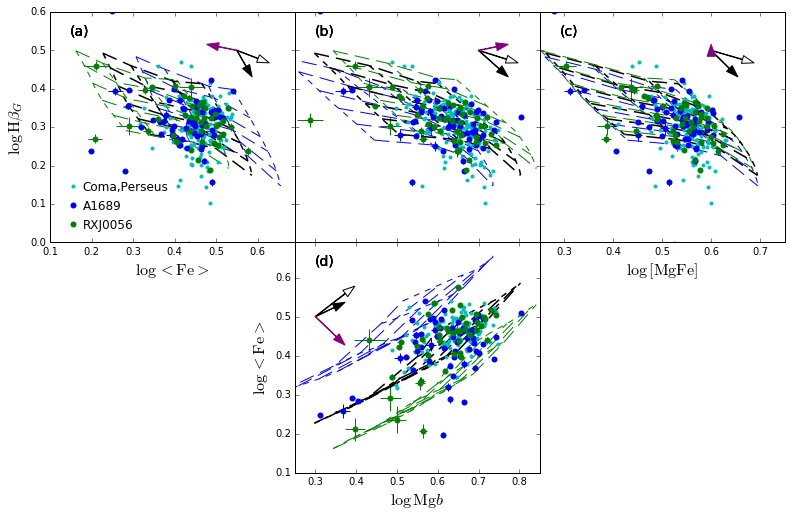

In [9]:
gs1 = gridspec.GridSpec(2,3)
gs1.update(left=0.1, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.0)
fig = plt.figure(figsize=(12,8))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)

mkmodelgrid(0.0, 'lfe', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.55, anchory=0.5)
mkmodelgrid(0.3, 'lfe', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lfe', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lfe_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'Coma')
scatterplot(df_pers.lfe_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'Perseus')
scatterplot(df_a1689.lfe_cor, df_a1689.lhbetaem_cor, df_a1689.e_lfe, df_a1689.e_lhbetaem, 'bo', 6,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'A1689')
scatterplot(df_rxj0056.lfe_cor, df_rxj0056.lhbetaem_cor, df_rxj0056.e_lfe, df_rxj0056.e_lhbetaem, 'go', 6,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'RXJ0056')

# get handles
handles, labels = ax1.get_legend_handles_labels()
# Get the last three only, Remove extra legend entry due to Coma and Perseus coming from different data frames
handles = handles[-3:]
labels = labels[-3:]
labels[0] = 'Coma,Perseus'
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='lower left',numpoints=1, handletextpad=-0.2, frameon=False)

ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lmgb', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.7, anchory=0.5)
mkmodelgrid(0.3, 'lmgb', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgb', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgb_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'Coma')
scatterplot(df_pers.lmgb_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'Perseus')
scatterplot(df_a1689.lmgb_cor, df_a1689.lhbetaem_cor, df_a1689.e_lmgb, df_a1689.e_lhbetaem, 'bo', 6,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'A1689')
scatterplot(df_rxj0056.lmgb_cor, df_rxj0056.lhbetaem_cor, df_rxj0056.e_lmgb, df_rxj0056.e_lhbetaem, 'go', 6,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'RXJ0056')


ax3 = plt.subplot(gs1[0,2])
plt.setp(ax3.get_xticklabels(), fontsize=10)
plt.setp(ax3.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lmgfe', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.6, anchory=0.5)
mkmodelgrid(0.3, 'lmgfe', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgfe', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgfe, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'Coma')
scatterplot(df_pers.lmgfe, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'Perseus')
scatterplot(df_a1689.lmgfe, df_a1689.lhbetaem_cor, df_a1689.e_lmgfe, df_a1689.e_lhbetaem, 'bo', 6,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'A1689')
scatterplot(df_rxj0056.lmgfe, df_rxj0056.lhbetaem_cor, df_rxj0056.e_lmgfe, df_rxj0056.e_lhbetaem, 'go', 6,
           r'$\log\, \rm{[MgFe]}$', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'RXJ0056')


ax4 = plt.subplot(gs1[1,1])
plt.setp(ax4.get_xticklabels(), fontsize=10)
plt.setp(ax4.get_yticklabels(), fontsize=10)

mkmodelgrid(0.0, 'lmgb', 'lfe', 'b', 1., mkarrows=True, anchorx=0.3, anchory=0.5)
mkmodelgrid(0.3, 'lmgb', 'lfe', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgb', 'lfe', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgb_cor, df_coma.lfe_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0.1, 0.69, ax4, '(d)', 'Coma')
scatterplot(df_pers.lmgb_cor, df_pers.lfe_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0.1, 0.69, ax4, '(d)', 'Perseus')
scatterplot(df_a1689.lmgb_cor, df_a1689.lfe_cor, df_a1689.e_lmgb, df_a1689.e_lfe, 'bo', 6,
           '', '', 0.25, 0.85, 0.1, 0.69, ax4, '(d)', 'A1689')
scatterplot(df_rxj0056.lmgb_cor, df_rxj0056.lfe_cor, df_rxj0056.e_lmgb, df_rxj0056.e_lfe, 'go', 6,
           r'$\log\, {\rm Mg}b$', r'$\log\, <{\rm Fe}>$', 0.25, 0.85, 0.1, 0.69, ax4, '(d)', 'RXJ0056')


plt.savefig('visline_p1.eps', format="eps")



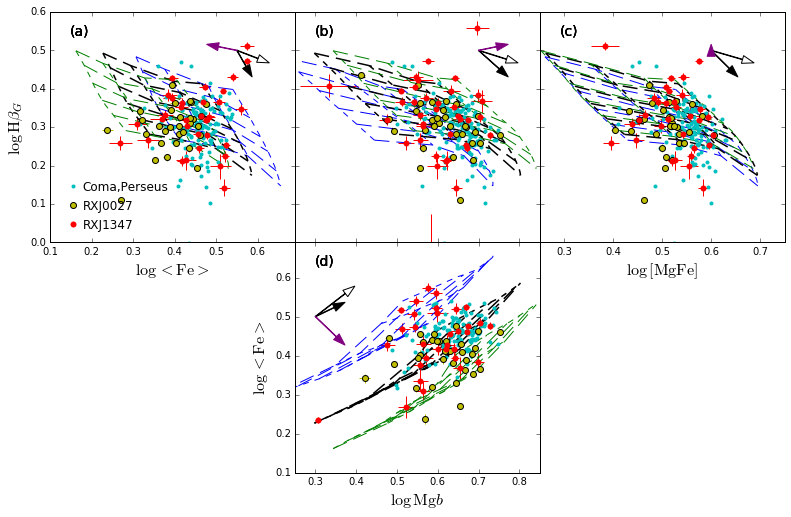

In [10]:
gs1 = gridspec.GridSpec(2,3)
gs1.update(left=0.1, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.0)
fig = plt.figure(figsize=(12,8))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)

mkmodelgrid(0.0, 'lfe', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.55, anchory=0.5)
mkmodelgrid(0.3, 'lfe', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lfe', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lfe_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'Coma')
scatterplot(df_pers.lfe_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'Perseus')
scatterplot(df_rxj0027.lfe_cor, df_rxj0027.lhbetaem_cor, df_rxj0027.e_lfe, df_rxj0027.e_lhbetaem, 'yo', 6,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'RXJ0027')
scatterplot(df_rxj1347.lfe_cor, df_rxj1347.lhbetaem_cor, df_rxj1347.e_lfe, df_rxj1347.e_lhbetaem, 'ro', 6,
           r'$\log\, <{\rm Fe}>$', r'$\log\, {\rm H}\beta _G$', 0.1, 0.69, 0., 0.6, ax1, '(a)', 'RXJ1347')

# get handles
handles, labels = ax1.get_legend_handles_labels()
# Get the last three only, Remove extra legend entry due to Coma and Perseus coming from different data frames
handles = handles[-3:]
labels = labels[-3:]
labels[0] = 'Coma,Perseus'
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='lower left',numpoints=1, handletextpad=-0.2, frameon=False)

ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lmgb', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.7, anchory=0.5)
mkmodelgrid(0.3, 'lmgb', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgb', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgb_cor, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'Coma')
scatterplot(df_pers.lmgb_cor, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'Perseus')
scatterplot(df_rxj0027.lmgb_cor, df_rxj0027.lhbetaem_cor, df_rxj0027.e_lmgb, df_rxj0027.e_lhbetaem, 'yo', 6,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'RXJ0027')
scatterplot(df_rxj1347.lmgb_cor, df_rxj1347.lhbetaem_cor, df_rxj1347.e_lmgb, df_rxj1347.e_lhbetaem, 'ro', 6,
           '', '', 0.25, 0.85, 0., 0.6, ax2, '(b)', 'RXJ1347')

ax3 = plt.subplot(gs1[0,2])
plt.setp(ax3.get_xticklabels(), fontsize=10)
plt.setp(ax3.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lmgfe', 'lhbetaem', 'b', 1., mkarrows=True, anchorx=0.6, anchory=0.5)
mkmodelgrid(0.3, 'lmgfe', 'lhbetaem', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgfe', 'lhbetaem', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgfe, df_coma.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'Coma')
scatterplot(df_pers.lmgfe, df_pers.lhbetaem_cor, None, None, 'co', 4,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'Perseus')
scatterplot(df_rxj0027.lmgfe, df_rxj0027.lhbetaem_cor, df_rxj0027.e_lmgfe, df_rxj0027.e_lhbetaem, 'yo', 6,
           '', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'RXJ0027')
scatterplot(df_rxj1347.lmgfe, df_rxj1347.lhbetaem_cor, df_rxj1347.e_lmgfe, df_rxj1347.e_lhbetaem, 'ro', 6,
           r'$\log\, \rm{[MgFe]}$', '', 0.25, 0.75, 0., 0.6, ax3, '(c)', 'RXJ1347')

ax4 = plt.subplot(gs1[1,1])
plt.setp(ax4.get_xticklabels(), fontsize=10)
plt.setp(ax4.get_yticklabels(), fontsize=10)

mkmodelgrid(0.0, 'lmgb', 'lfe', 'b', 1., mkarrows=True, anchorx=0.3, anchory=0.5)
mkmodelgrid(0.3, 'lmgb', 'lfe', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lmgb', 'lfe', 'g', 1., mkarrows=False)
scatterplot(df_coma.lmgb_cor, df_coma.lfe_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0.1, 0.69, ax4, '(d)', 'Coma')
scatterplot(df_pers.lmgb_cor, df_pers.lfe_cor, None, None, 'co', 4,
           '', '', 0.25, 0.85, 0.1, 0.69, ax4, '(d)', 'Perseus')
scatterplot(df_rxj0027.lmgb_cor, df_rxj0027.lfe_cor, df_rxj0027.e_lmgb, df_rxj0027.e_lfe, 'yo', 6,
           '', '', 0.25, 0.85, 0.1, 0.69, ax4, '(d)', 'RXJ0027')
scatterplot(df_rxj1347.lmgb_cor, df_rxj1347.lfe_cor, df_rxj1347.e_lmgb, df_rxj1347.e_lfe, 'ro', 6,
           r'$\log\, {\rm Mg}b$', r'$\log\, <{\rm Fe}>$', 0.25, 0.85, 0.1, 0.69, ax4, '(d)', 'RXJ1347')


plt.savefig('visline_p2.eps', format="eps")


** Blue line indices - merged plot for all clusters **

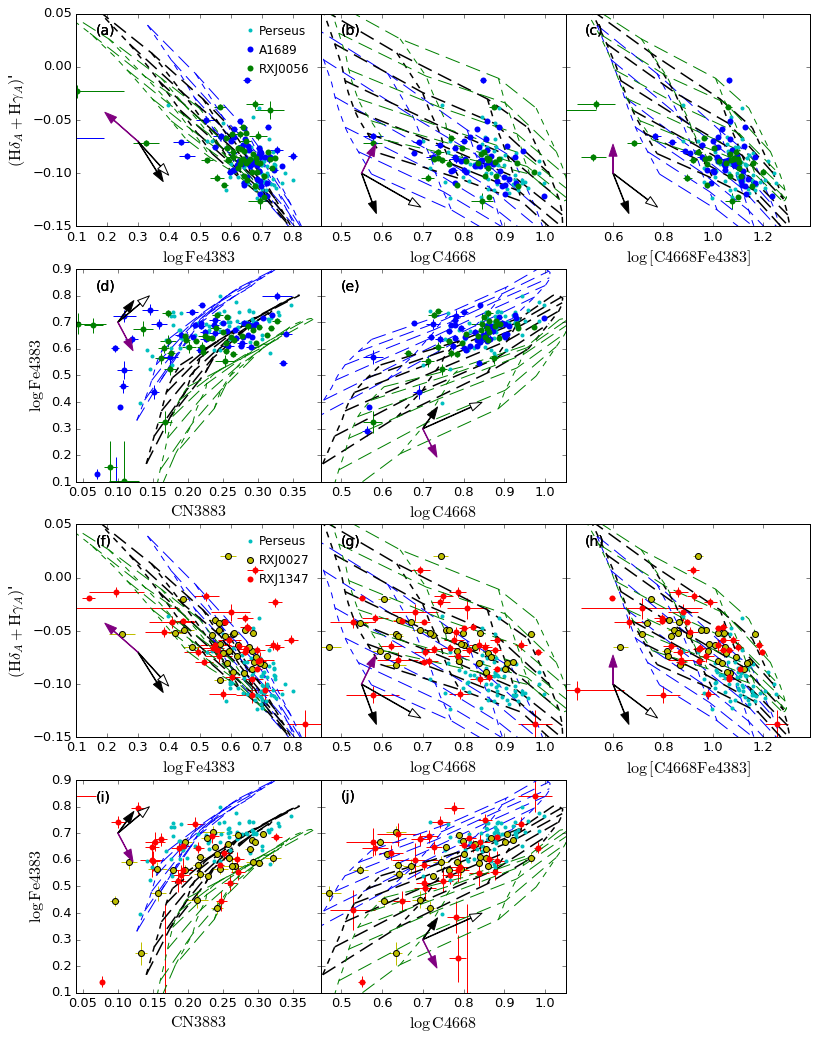

In [11]:
gs1 = gridspec.GridSpec(4,3)
gs1.update(left=0.1, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.2)
fig = plt.figure(figsize=(12,17))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), fontsize=13)
plt.setp(ax1.get_yticklabels(), fontsize=13)

mkmodelgrid(0.0, 'lfe4383', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.3, anchory=-0.07)
mkmodelgrid(0.3, 'lfe4383', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lfe4383', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lfe4383_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.89, -0.15, 0.05, ax1, '(a)', 'Perseus')
scatterplot(df_a1689.lfe4383_cor, df_a1689.lhdga_cor, df_a1689.e_lfe4383, df_a1689.e_lhdga, 'bo', 6,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.89, -0.15, 0.05, ax1, '(a)', 'A1689')
scatterplot(df_rxj0056.lfe4383_cor, df_rxj0056.lhdga_cor, df_rxj0056.e_lfe4383, df_rxj0056.e_lhdga, 'go', 6,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.89, -0.15, 0.05, ax1, '(a)', 'RXJ0056')
# get handles
handles, labels = ax1.get_legend_handles_labels()
# Get the last three only,
handles = handles[-3:]
labels = labels[-3:]
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), fontsize=13)
plt.setp(ax2.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.55, anchory=-0.1)
mkmodelgrid(0.3, 'lc4668', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'Perseus')
scatterplot(df_a1689.lc4668_cor, df_a1689.lhdga_cor, df_a1689.e_lc4668, df_a1689.e_lhdga, 'bo', 6,
           '', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'A1689')
scatterplot(df_rxj0056.lc4668_cor, df_rxj0056.lhdga_cor, df_rxj0056.e_lc4668, df_rxj0056.e_lhdga, 'go', 6,
           r'$\log\, {\rm C4668}$', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'RXJ0056')

ax3 = plt.subplot(gs1[0,2])
plt.setp(ax3.get_xticklabels(), fontsize=13)
plt.setp(ax3.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668fe', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.6, anchory=-0.1)
mkmodelgrid(0.3, 'lc4668fe', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668fe', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668fe, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'Perseus')
scatterplot(df_a1689.lc4668fe, df_a1689.lhdga_cor, df_a1689.e_lc4668fe, df_a1689.e_lhdga, 'bo', 6,
           '', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'A1689')
scatterplot(df_rxj0056.lc4668fe, df_rxj0056.lhdga_cor, df_rxj0056.e_lc4668fe, df_rxj0056.e_lhdga, 'go', 6,
           r'$\log\, \rm{[C4668Fe4383]}$', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'RXJ0056')

ax4 = plt.subplot(gs1[1,0])
plt.setp(ax4.get_xticklabels(), fontsize=13)
plt.setp(ax4.get_yticklabels(), fontsize=13)

mkmodelgrid(0.0, 'cn3883', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.1, anchory=0.7)
mkmodelgrid(0.3, 'cn3883', 'lfe4383', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'cn3883', 'lfe4383', 'g', 1., mkarrows=False)
scatterplot(df_pers.cn3883_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'Perseus')
scatterplot(df_a1689.cn3883_cor, df_a1689.lfe4383_cor, df_a1689.e_cn3883, df_a1689.e_lfe4383, 'bo', 6,
           '', '', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'A1689')
scatterplot(df_rxj0056.cn3883_cor, df_rxj0056.lfe4383_cor, df_rxj0056.e_cn3883, df_rxj0056.e_lfe4383, 'go', 6,
           r'${\rm CN3883}$', r'$\log\, {\rm Fe4383}$', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'RXJ0056')

ax5 = plt.subplot(gs1[1,1])
plt.setp(ax5.get_xticklabels(), fontsize=13)
plt.setp(ax5.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.7, anchory=0.3)
mkmodelgrid(0.3, 'lc4668', 'lfe4383', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668', 'lfe4383', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'Perseus')
scatterplot(df_a1689.lc4668_cor, df_a1689.lfe4383_cor, df_a1689.e_lc4668, df_a1689.e_lfe4383, 'bo', 6,
           '', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'A1689')
scatterplot(df_rxj0056.lc4668_cor, df_rxj0056.lfe4383_cor, df_rxj0056.e_lc4668, df_rxj0056.e_lfe4383, 'go', 6,
           r'$\log\, {\rm C4668}$', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'RXJ0056')

# =======
ax6 = plt.subplot(gs1[2,0])
plt.setp(ax6.get_xticklabels(), fontsize=13)
plt.setp(ax6.get_yticklabels(), fontsize=13)

mkmodelgrid(0.0, 'lfe4383', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.3, anchory=-0.07)
mkmodelgrid(0.3, 'lfe4383', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lfe4383', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lfe4383_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.89, -0.15, 0.05, ax6, '(f)', 'Perseus')
scatterplot(df_rxj0027.lfe4383_cor, df_rxj0027.lhdga_cor, df_rxj0027.e_lfe4383, df_rxj0027.e_lhdga, 'yo', 6,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.89, -0.15, 0.05, ax6, '(f)', 'RXJ0027')
scatterplot(df_rxj1347.lfe4383_cor, df_rxj1347.lhdga_cor, df_rxj1347.e_lfe4383, df_rxj1347.e_lhdga, 'ro', 6,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.89, -0.15, 0.05, ax6, '(f)', 'RXJ1347')
# get handles
handles, labels = ax6.get_legend_handles_labels()
# Get the last three only,
handles = handles[-3:]
labels = labels[-3:]
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax6.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


ax7 = plt.subplot(gs1[2,1])
plt.setp(ax7.get_xticklabels(), fontsize=13)
plt.setp(ax7.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.55, anchory=-0.1)
mkmodelgrid(0.3, 'lc4668', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', 0.45, 1.05, -0.15, 0.05, ax7, '(g)', 'Perseus')
scatterplot(df_rxj0027.lc4668_cor, df_rxj0027.lhdga_cor, df_rxj0027.e_lc4668, df_rxj0027.e_lhdga, 'yo', 6,
           '', '', 0.45, 1.05, -0.15, 0.05, ax7, '(g)', 'RXJ0027')
scatterplot(df_rxj1347.lc4668_cor, df_rxj1347.lhdga_cor, df_rxj1347.e_lc4668, df_rxj1347.e_lhdga, 'ro', 6,
           r'$\log\, {\rm C4668}$', '', 0.45, 1.05, -0.15, 0.05, ax7, '(g)', 'RXJ1347')

ax8 = plt.subplot(gs1[2,2])
plt.setp(ax8.get_xticklabels(), fontsize=13)
plt.setp(ax8.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668fe', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.6, anchory=-0.1)
mkmodelgrid(0.3, 'lc4668fe', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668fe', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668fe, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', 0.41, 1.39, -0.15, 0.05, ax8, '(h)', 'Perseus')
scatterplot(df_rxj0027.lc4668fe, df_rxj0027.lhdga_cor, df_rxj0027.e_lc4668fe, df_rxj0027.e_lhdga, 'yo', 6,
           '', '', 0.41, 1.39, -0.15, 0.05, ax8, '(h)', 'RXJ0027')
scatterplot(df_rxj1347.lc4668fe, df_rxj1347.lhdga_cor, df_rxj1347.e_lc4668fe, df_rxj1347.e_lhdga, 'ro', 6,
           r'$\log\, \rm{[C4668Fe4383]}$', '', 0.41, 1.39, -0.15, 0.05, ax8, '(h)', 'RXJ1347')

ax9 = plt.subplot(gs1[3,0])
plt.setp(ax9.get_xticklabels(), fontsize=13)
plt.setp(ax9.get_yticklabels(), fontsize=13)

mkmodelgrid(0.0, 'cn3883', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.1, anchory=0.7)
mkmodelgrid(0.3, 'cn3883', 'lfe4383', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'cn3883', 'lfe4383', 'g', 1., mkarrows=False)
scatterplot(df_pers.cn3883_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', 0.04, 0.39, 0.1, 0.9, ax9, '(i)', 'Perseus')
scatterplot(df_rxj0027.cn3883_cor, df_rxj0027.lfe4383_cor, df_rxj0027.e_cn3883, df_rxj0027.e_lfe4383, 'yo', 6,
           '', '', 0.04, 0.39, 0.1, 0.9, ax9, '(i)', 'RXJ0027')
scatterplot(df_rxj1347.cn3883_cor, df_rxj1347.lfe4383_cor, df_rxj1347.e_cn3883, df_rxj1347.e_lfe4383, 'ro', 6,
           r'${\rm CN3883}$', r'$\log\, {\rm Fe4383}$', 0.04, 0.39, 0.1, 0.9, ax9, '(i)', 'RXJ1347')

ax10 = plt.subplot(gs1[3,1])
plt.setp(ax10.get_xticklabels(), fontsize=13)
plt.setp(ax10.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.7, anchory=0.3)
mkmodelgrid(0.3, 'lc4668', 'lfe4383', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668', 'lfe4383', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', 0.45, 1.05, 0.1, 0.9, ax10, '(j)', 'Perseus')
scatterplot(df_rxj0027.lc4668_cor, df_rxj0027.lfe4383_cor, df_rxj0027.e_lc4668, df_rxj0027.e_lfe4383, 'yo', 6,
           '', '', 0.45, 1.05, 0.1, 0.9, ax10, '(j)', 'RXJ0027')
scatterplot(df_rxj1347.lc4668_cor, df_rxj1347.lfe4383_cor, df_rxj1347.e_lc4668, df_rxj1347.e_lfe4383, 'ro', 6,
           r'$\log\, {\rm C4668}$', '', 0.45, 1.05, 0.1, 0.9, ax10, '(j)', 'RXJ1347')

plt.savefig('blueline_all.eps', format="eps")

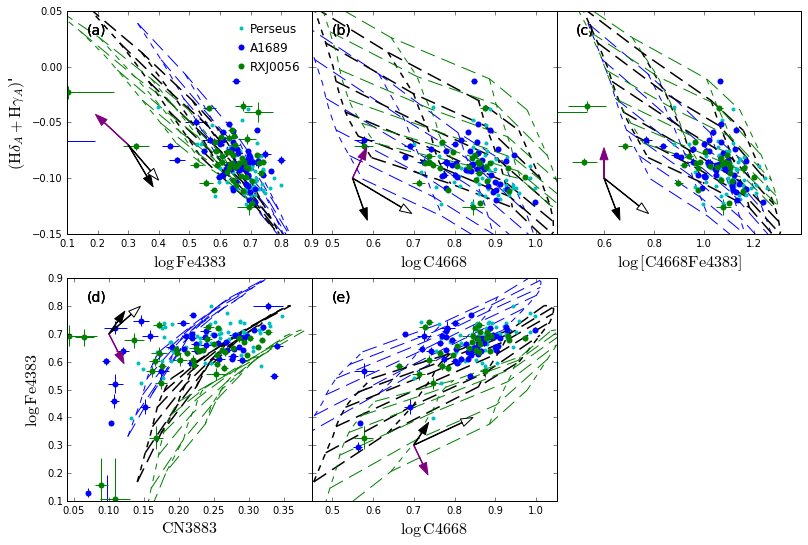

In [12]:
gs1 = gridspec.GridSpec(2,3)
gs1.update(left=0.1, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.2)
fig = plt.figure(figsize=(12,8.5))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)

mkmodelgrid(0.0, 'lfe4383', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.3, anchory=-0.07)
mkmodelgrid(0.3, 'lfe4383', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lfe4383', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lfe4383_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.9, -0.15, 0.05, ax1, '(a)', 'Perseus')
scatterplot(df_a1689.lfe4383_cor, df_a1689.lhdga_cor, df_a1689.e_lfe4383, df_a1689.e_lhdga, 'bo', 6,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.9, -0.15, 0.05, ax1, '(a)', 'A1689')
scatterplot(df_rxj0056.lfe4383_cor, df_rxj0056.lhdga_cor, df_rxj0056.e_lfe4383, df_rxj0056.e_lhdga, 'go', 6,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.9, -0.15, 0.05, ax1, '(a)', 'RXJ0056')
# get handles
handles, labels = ax1.get_legend_handles_labels()
# Get the last three only,
handles = handles[-3:]
labels = labels[-3:]
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), fontsize=10)
plt.setp(ax2.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.55, anchory=-0.1)
mkmodelgrid(0.3, 'lc4668', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'Perseus')
scatterplot(df_a1689.lc4668_cor, df_a1689.lhdga_cor, df_a1689.e_lc4668, df_a1689.e_lhdga, 'bo', 6,
           '', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'A1689')
scatterplot(df_rxj0056.lc4668_cor, df_rxj0056.lhdga_cor, df_rxj0056.e_lc4668, df_rxj0056.e_lhdga, 'go', 6,
           r'$\log\, {\rm C4668}$', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'RXJ0056')

ax3 = plt.subplot(gs1[0,2])
plt.setp(ax3.get_xticklabels(), fontsize=10)
plt.setp(ax3.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668fe', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.6, anchory=-0.1)
mkmodelgrid(0.3, 'lc4668fe', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668fe', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668fe, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'Perseus')
scatterplot(df_a1689.lc4668fe, df_a1689.lhdga_cor, df_a1689.e_lc4668fe, df_a1689.e_lhdga, 'bo', 6,
           '', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'A1689')
scatterplot(df_rxj0056.lc4668fe, df_rxj0056.lhdga_cor, df_rxj0056.e_lc4668fe, df_rxj0056.e_lhdga, 'go', 6,
           r'$\log\, \rm{[C4668Fe4383]}$', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'RXJ0056')

ax4 = plt.subplot(gs1[1,0])
plt.setp(ax4.get_xticklabels(), fontsize=10)
plt.setp(ax4.get_yticklabels(), fontsize=10)

mkmodelgrid(0.0, 'cn3883', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.1, anchory=0.7)
mkmodelgrid(0.3, 'cn3883', 'lfe4383', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'cn3883', 'lfe4383', 'g', 1., mkarrows=False)
scatterplot(df_pers.cn3883_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'Perseus')
scatterplot(df_a1689.cn3883_cor, df_a1689.lfe4383_cor, df_a1689.e_cn3883, df_a1689.e_lfe4383, 'bo', 6,
           '', '', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'A1689')
scatterplot(df_rxj0056.cn3883_cor, df_rxj0056.lfe4383_cor, df_rxj0056.e_cn3883, df_rxj0056.e_lfe4383, 'go', 6,
           r'${\rm CN3883}$', r'$\log\, {\rm Fe4383}$', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'RXJ0056')

ax5 = plt.subplot(gs1[1,1])
plt.setp(ax5.get_xticklabels(), fontsize=10)
plt.setp(ax5.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.7, anchory=0.3)
mkmodelgrid(0.3, 'lc4668', 'lfe4383', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668', 'lfe4383', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'Perseus')
scatterplot(df_a1689.lc4668_cor, df_a1689.lfe4383_cor, df_a1689.e_lc4668, df_a1689.e_lfe4383, 'bo', 6,
           '', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'A1689')
scatterplot(df_rxj0056.lc4668_cor, df_rxj0056.lfe4383_cor, df_rxj0056.e_lc4668, df_rxj0056.e_lfe4383, 'go', 6,
           r'$\log\, {\rm C4668}$', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'RXJ0056')


plt.savefig('blueline_p1.eps', format="eps")

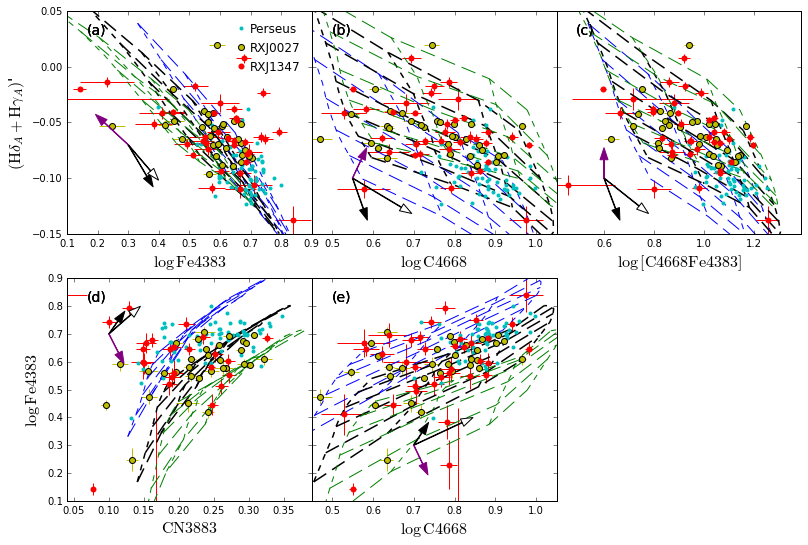

In [13]:
gs1 = gridspec.GridSpec(2,3)
gs1.update(left=0.1, right=0.95, bottom=0.15, top=0.95, wspace=0.0, hspace=0.2)
fig = plt.figure(figsize=(12,8.5))
ax = plt.axes([0., 0., 1., 1.], frameon=False, xticks=[],yticks=[])

ax1 = plt.subplot(gs1[0,0])
plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)

mkmodelgrid(0.0, 'lfe4383', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.3, anchory=-0.07)
mkmodelgrid(0.3, 'lfe4383', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lfe4383', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lfe4383_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.9, -0.15, 0.05, ax1, '(a)', 'Perseus')
scatterplot(df_rxj0027.lfe4383_cor, df_rxj0027.lhdga_cor, df_rxj0027.e_lfe4383, df_rxj0027.e_lhdga, 'yo', 6,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.9, -0.15, 0.05, ax1, '(a)', 'RXJ0027')
scatterplot(df_rxj1347.lfe4383_cor, df_rxj1347.lhdga_cor, df_rxj1347.e_lfe4383, df_rxj1347.e_lhdga, 'ro', 6,
           r'$\log\, {\rm Fe4383}$', r"$({\rm H}\delta _A + {\rm H}\gamma _A)$'", 0.1, 0.9, -0.15, 0.05, ax1, '(a)', 'RXJ1347')
# get handles
handles, labels = ax1.get_legend_handles_labels()
# Get the last three only,
handles = handles[-3:]
labels = labels[-3:]
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax1.legend(handles, labels, loc='upper right',numpoints=1, handletextpad=-0.2, frameon=False)


ax2 = plt.subplot(gs1[0,1])
plt.setp(ax2.get_xticklabels(), fontsize=10)
plt.setp(ax2.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.55, anchory=-0.1)
mkmodelgrid(0.3, 'lc4668', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668_cor, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'Perseus')
scatterplot(df_rxj0027.lc4668_cor, df_rxj0027.lhdga_cor, df_rxj0027.e_lc4668, df_rxj0027.e_lhdga, 'yo', 6,
           '', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'RXJ0027')
scatterplot(df_rxj1347.lc4668_cor, df_rxj1347.lhdga_cor, df_rxj1347.e_lc4668, df_rxj1347.e_lhdga, 'ro', 6,
           r'$\log\, {\rm C4668}$', '', 0.45, 1.05, -0.15, 0.05, ax2, '(b)', 'RXJ1347')

ax3 = plt.subplot(gs1[0,2])
plt.setp(ax3.get_xticklabels(), fontsize=10)
plt.setp(ax3.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668fe', 'lhdga', 'b', 1., mkarrows=True, anchorx=0.6, anchory=-0.1)
mkmodelgrid(0.3, 'lc4668fe', 'lhdga', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668fe', 'lhdga', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668fe, df_pers.lhdga_cor, None, None, 'co', 4,
           '', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'Perseus')
scatterplot(df_rxj0027.lc4668fe, df_rxj0027.lhdga_cor, df_rxj0027.e_lc4668fe, df_rxj0027.e_lhdga, 'yo', 6,
           '', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'RXJ0027')
scatterplot(df_rxj1347.lc4668fe, df_rxj1347.lhdga_cor, df_rxj1347.e_lc4668fe, df_rxj1347.e_lhdga, 'ro', 6,
           r'$\log\, \rm{[C4668Fe4383]}$', '', 0.41, 1.39, -0.15, 0.05, ax3, '(c)', 'RXJ1347')

ax4 = plt.subplot(gs1[1,0])
plt.setp(ax4.get_xticklabels(), fontsize=10)
plt.setp(ax4.get_yticklabels(), fontsize=10)

mkmodelgrid(0.0, 'cn3883', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.1, anchory=0.7)
mkmodelgrid(0.3, 'cn3883', 'lfe4383', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'cn3883', 'lfe4383', 'g', 1., mkarrows=False)
scatterplot(df_pers.cn3883_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'Perseus')
scatterplot(df_rxj0027.cn3883_cor, df_rxj0027.lfe4383_cor, df_rxj0027.e_cn3883, df_rxj0027.e_lfe4383, 'yo', 6,
           '', '', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'RXJ0027')
scatterplot(df_rxj1347.cn3883_cor, df_rxj1347.lfe4383_cor, df_rxj1347.e_cn3883, df_rxj1347.e_lfe4383, 'ro', 6,
           r'${\rm CN3883}$', r'$\log\, {\rm Fe4383}$', 0.04, 0.39, 0.1, 0.9, ax4, '(d)', 'RXJ1347')

ax5 = plt.subplot(gs1[1,1])
plt.setp(ax5.get_xticklabels(), fontsize=10)
plt.setp(ax5.get_yticklabels(), visible=False)

mkmodelgrid(0.0, 'lc4668', 'lfe4383', 'b', 1., mkarrows=True, anchorx=0.7, anchory=0.3)
mkmodelgrid(0.3, 'lc4668', 'lfe4383', 'k', 1.5, mkarrows=False)
mkmodelgrid(0.5, 'lc4668', 'lfe4383', 'g', 1., mkarrows=False)
scatterplot(df_pers.lc4668_cor, df_pers.lfe4383_cor, None, None, 'co', 4,
           '', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'Perseus')
scatterplot(df_rxj0027.lc4668_cor, df_rxj0027.lfe4383_cor, df_rxj0027.e_lc4668, df_rxj0027.e_lfe4383, 'yo', 6,
           '', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'RXJ0027')
scatterplot(df_rxj1347.lc4668_cor, df_rxj1347.lfe4383_cor, df_rxj1347.e_lc4668, df_rxj1347.e_lfe4383, 'ro', 6,
           r'$\log\, {\rm C4668}$', '', 0.45, 1.05, 0.1, 0.9, ax5, '(e)', 'RXJ1347')

plt.savefig('blueline_p2.eps', format="eps")